In [11]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For multivariate outlier detection (Isolation Forest)
from sklearn.ensemble import IsolationForest

# Set plotting styles (optional)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset (update the file path if needed)
file_path = "data/credit_risk/dataproject2024.xlsx"
df = pd.read_excel(file_path)

In [12]:
# Display initial data overview
print("First 5 rows:")
df.head()

==== Data Overview ====
First 5 rows:


ID  Job tenure  Age  Car price  Funding amount  Down payment  \
0   1          34   55       4875            3087             0   
1   2           5   29      13000           13000             0   
2   3          14   38      17190           14190             0   
3   4          16   37      22773           23568             0   
4   5           1   61       7700            8526             0   

   Loan duration  Monthly payment  Credit event  Married  Homeowner  \
0             36         0.047895             0        1          1   
1             60         0.091667             0        0          0   
2             60         0.088235             0        0          0   
3             48         0.110084             0        1          1   
4             48         0.123404             0        1          0   

   Default (y)  Pred_default (y_hat)        PD  Group  
0            0                     0  0.024480      1  
1            1                     0  0.331661      0  
2            0                     0  0.187505      0  
3            0                     0  0.035441      1  
4            1                     0  0.340883      0

In [13]:
print("\nData Info:")
df.info()



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430 entries, 0 to 7429
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7430 non-null   int64  
 1   Job tenure            7430 non-null   int64  
 2   Age                   7430 non-null   int64  
 3   Car price             7430 non-null   int64  
 4   Funding amount        7430 non-null   int64  
 5   Down payment          7430 non-null   int64  
 6   Loan duration         7430 non-null   int64  
 7   Monthly payment       7430 non-null   float64
 8   Credit event          7430 non-null   int64  
 9   Married               7430 non-null   int64  
 10  Homeowner             7430 non-null   int64  
 11  Default (y)           7430 non-null   int64  
 12  Pred_default (y_hat)  7430 non-null   int64  
 13  PD                    7430 non-null   float64
 14  Group                 7430 non-null   int64  
dtypes: float6

In [24]:
print("\nDescriptive Statistics (numeric):")
df.describe()


Descriptive Statistics (numeric):


ID   Job tenure          Age     Car price  Funding amount  \
count  7430.000000  7430.000000  7430.000000   7430.000000     7430.000000   
mean   3715.500000     9.329475    45.169717  12931.183311    11457.803769   
std    2145.000583     9.978638    14.790760   6202.407112     6015.033981   
min       1.000000     0.000000    18.000000    546.000000      546.000000   
25%    1858.250000     2.000000    33.000000   8147.750000     6845.250000   
50%    3715.500000     5.000000    46.000000  11950.000000    10382.500000   
75%    5572.750000    15.000000    55.000000  16500.000000    15000.000000   
max    7430.000000    58.000000    89.000000  47051.000000    30000.000000   

       Down payment  Loan duration  Monthly payment  Credit event  \
count   7430.000000    7430.000000      7430.000000   7430.000000   
mean       0.089367      56.220054         0.105143      0.022073   
std        0.285293      19.385787         0.061121      0.146930   
min        0.000000       6.000000         0.005128      0.000000   
25%        0.000000      48.000000         0.069032      0.000000   
50%        0.000000      60.000000         0.094662      0.000000   
75%        0.000000      72.000000         0.130393      0.000000   
max        1.000000      96.000000         2.630000      1.000000   

           Married    Homeowner  Default (y)  Pred_default (y_hat)  \
count  7430.000000  7430.000000  7430.000000           7430.000000   
mean      0.534859     0.384926     0.199865              0.116151   
std       0.498817     0.486611     0.399926              0.320427   
min       0.000000     0.000000     0.000000              0.000000   
25%       0.000000     0.000000     0.000000              0.000000   
50%       1.000000     0.000000     0.000000              0.000000   
75%       1.000000     1.000000     0.000000              0.000000   
max       1.000000     1.000000     1.000000              1.000000   

                PD        Group  
count  7430.000000  7430.000000  
mean      0.199455     0.309421  
std       0.211005     0.462286  
min       0.001125     0.000000  
25%       0.042802     0.000000  
50%       0.114024     0.000000  
75%       0.290813     1.000000  
max       0.972434     1.000000

In [15]:
# For categorical and non-numeric data, use describe with include='all'
print("\nDescriptive Statistics (all data):")
df.describe(include='all')


Descriptive Statistics (all data):


ID   Job tenure          Age     Car price  Funding amount  \
count  7430.000000  7430.000000  7430.000000   7430.000000     7430.000000   
mean   3715.500000     9.329475    45.169717  12931.183311    11457.803769   
std    2145.000583     9.978638    14.790760   6202.407112     6015.033981   
min       1.000000     0.000000    18.000000    546.000000      546.000000   
25%    1858.250000     2.000000    33.000000   8147.750000     6845.250000   
50%    3715.500000     5.000000    46.000000  11950.000000    10382.500000   
75%    5572.750000    15.000000    55.000000  16500.000000    15000.000000   
max    7430.000000    58.000000    89.000000  47051.000000    30000.000000   

       Down payment  Loan duration  Monthly payment  Credit event  \
count   7430.000000    7430.000000      7430.000000   7430.000000   
mean       0.089367      56.220054         0.105143      0.022073   
std        0.285293      19.385787         0.061121      0.146930   
min        0.000000       6.000000         0.005128      0.000000   
25%        0.000000      48.000000         0.069032      0.000000   
50%        0.000000      60.000000         0.094662      0.000000   
75%        0.000000      72.000000         0.130393      0.000000   
max        1.000000      96.000000         2.630000      1.000000   

           Married    Homeowner  Default (y)  Pred_default (y_hat)  \
count  7430.000000  7430.000000  7430.000000           7430.000000   
mean      0.534859     0.384926     0.199865              0.116151   
std       0.498817     0.486611     0.399926              0.320427   
min       0.000000     0.000000     0.000000              0.000000   
25%       0.000000     0.000000     0.000000              0.000000   
50%       1.000000     0.000000     0.000000              0.000000   
75%       1.000000     1.000000     0.000000              0.000000   
max       1.000000     1.000000     1.000000              1.000000   

                PD        Group  
count  7430.000000  7430.000000  
mean      0.199455     0.309421  
std       0.211005     0.462286  
min       0.001125     0.000000  
25%       0.042802     0.000000  
50%       0.114024     0.000000  
75%       0.290813     1.000000  
max       0.972434     1.000000

In [16]:
# ===== Missing Values Analysis =====
print("\n==== Missing Values Analysis ====")
missing_counts = df.isnull().sum()
print("Missing values per column:")
missing_counts


==== Missing Values Analysis ====
Missing values per column:


ID                      0
Job tenure              0
Age                     0
Car price               0
Funding amount          0
Down payment            0
Loan duration           0
Monthly payment         0
Credit event            0
Married                 0
Homeowner               0
Default (y)             0
Pred_default (y_hat)    0
PD                      0
Group                   0
dtype: int64


==== Distribution Analysis for Numeric Columns ====
Numeric columns found: ['ID', 'Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment', 'Loan duration', 'Monthly payment', 'Credit event', 'Married', 'Homeowner', 'Default (y)', 'Pred_default (y_hat)', 'PD', 'Group']


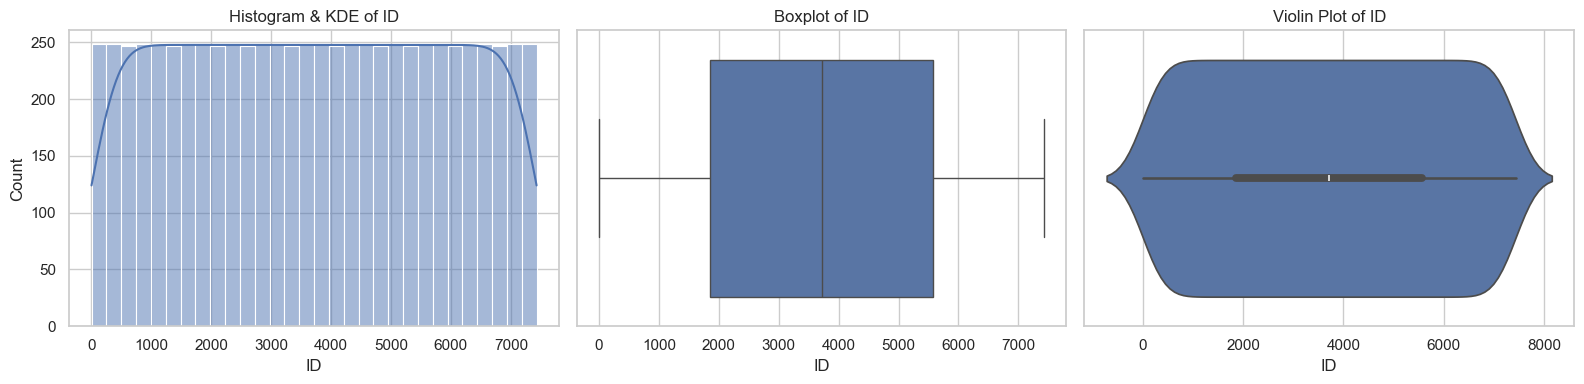

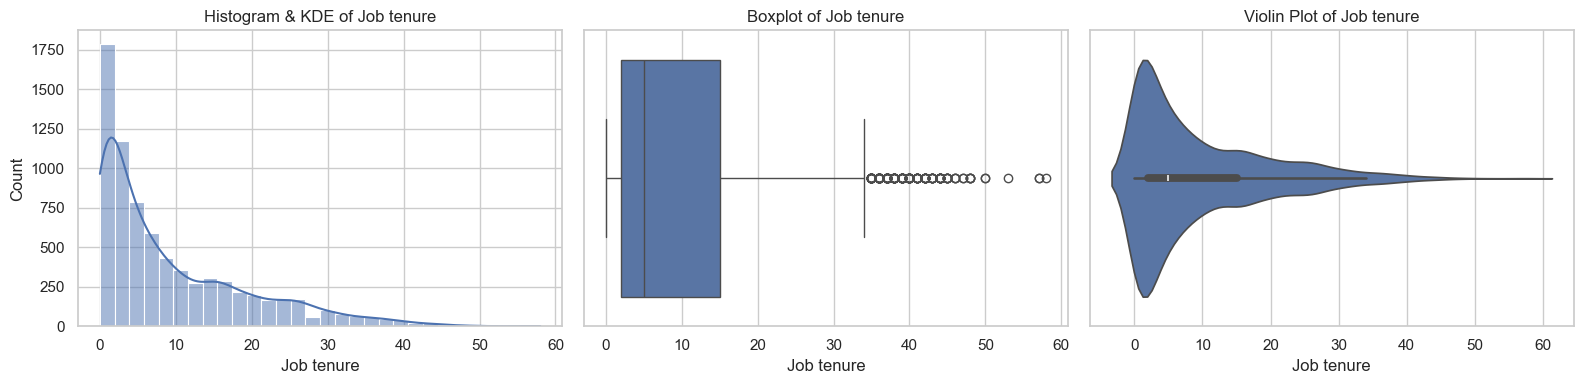

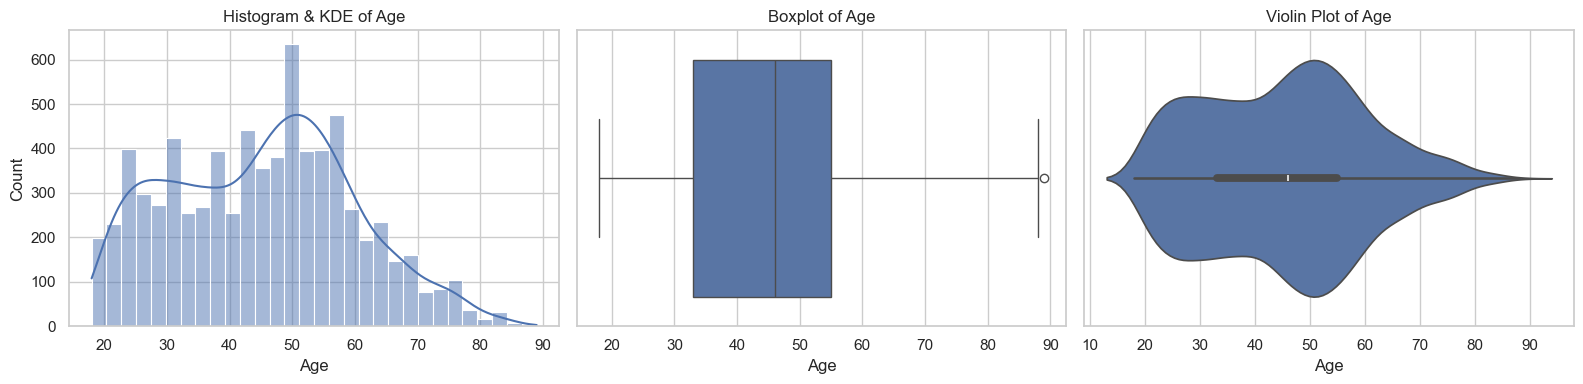

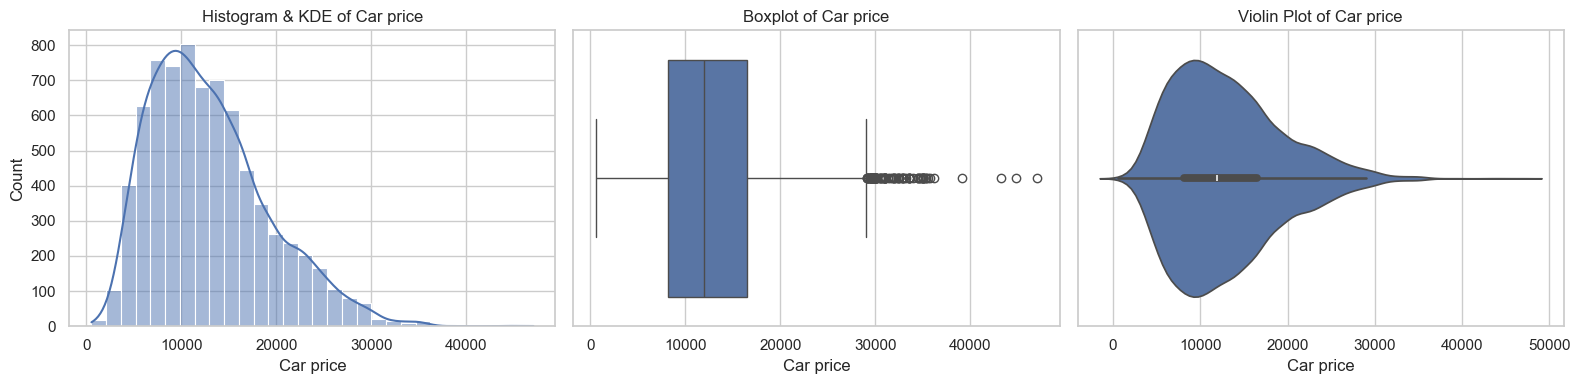

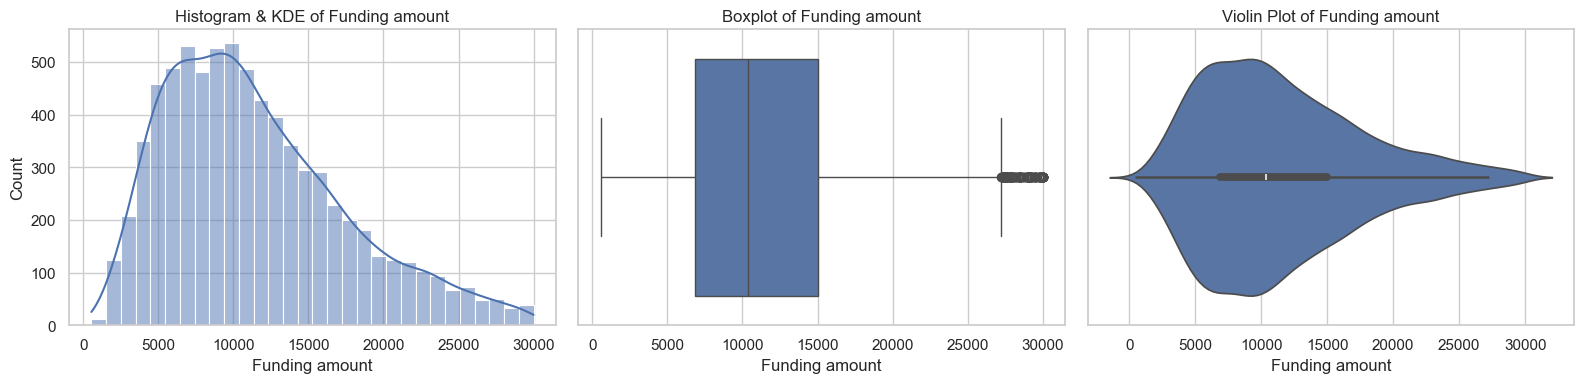

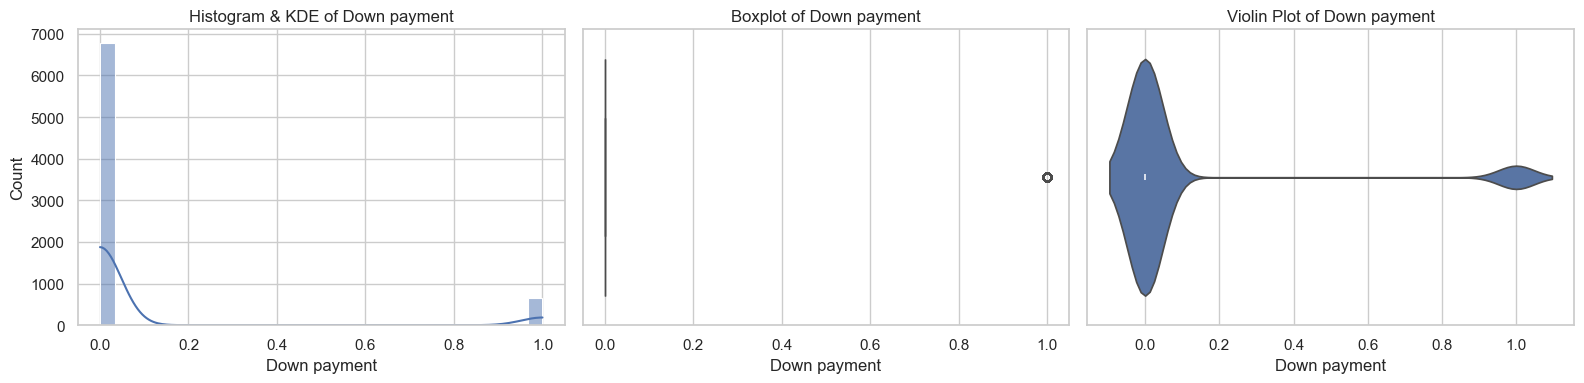

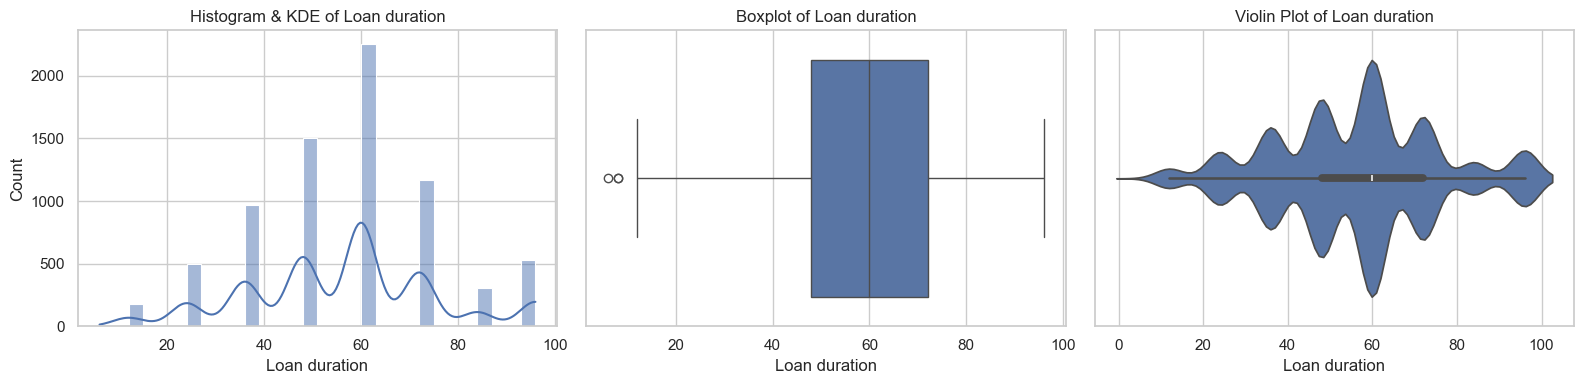

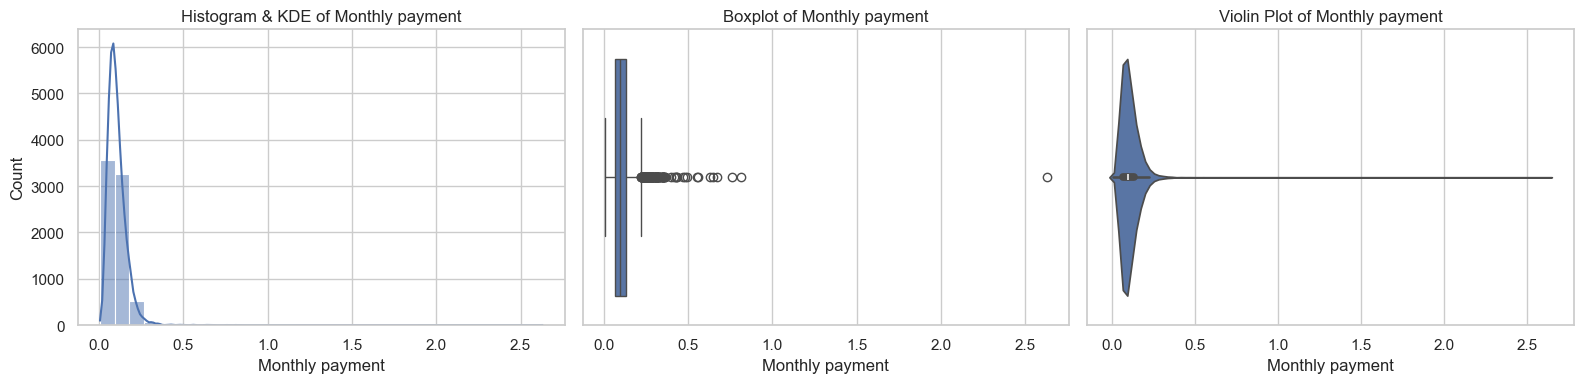

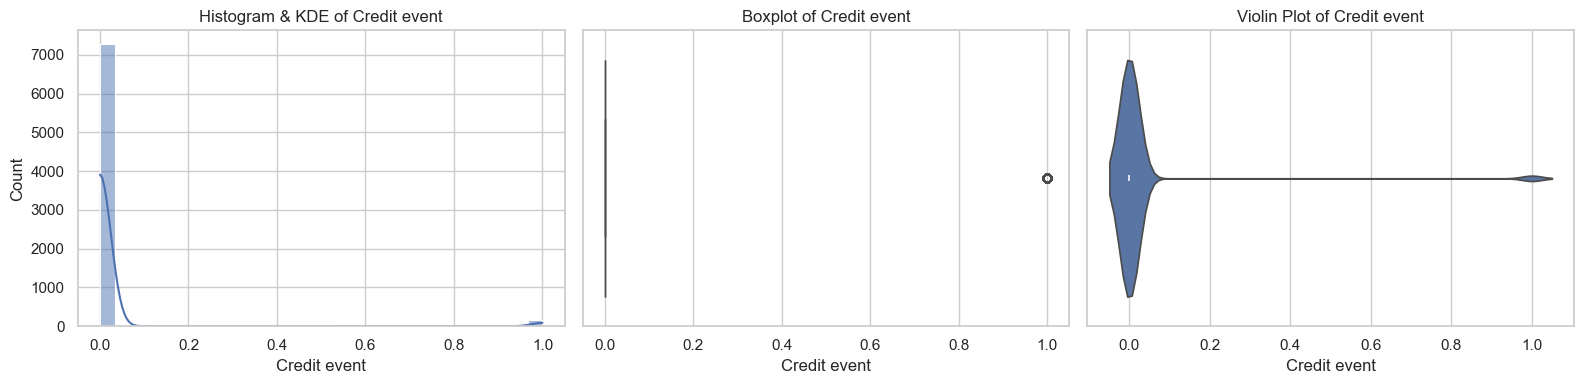

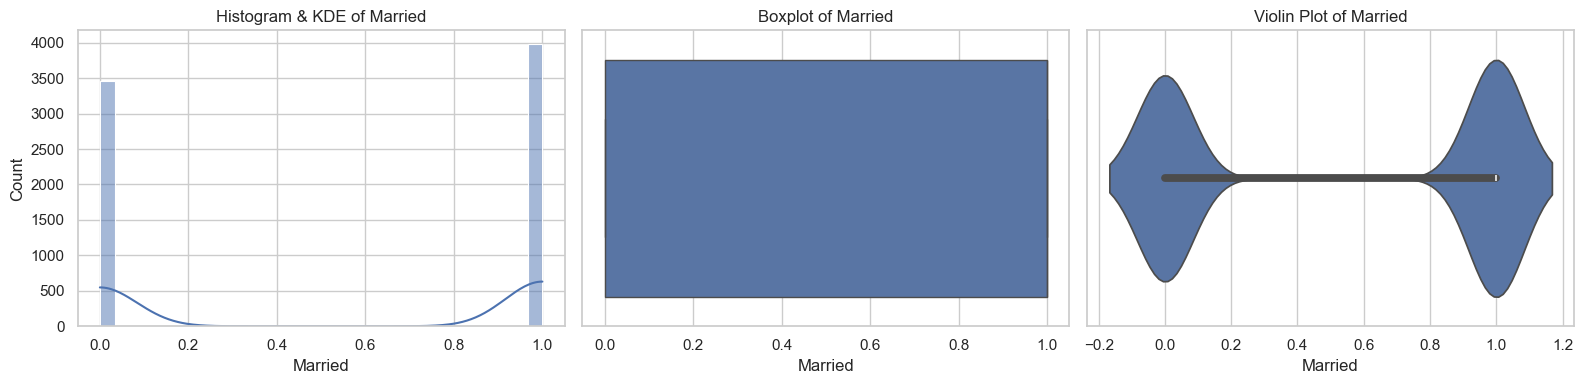

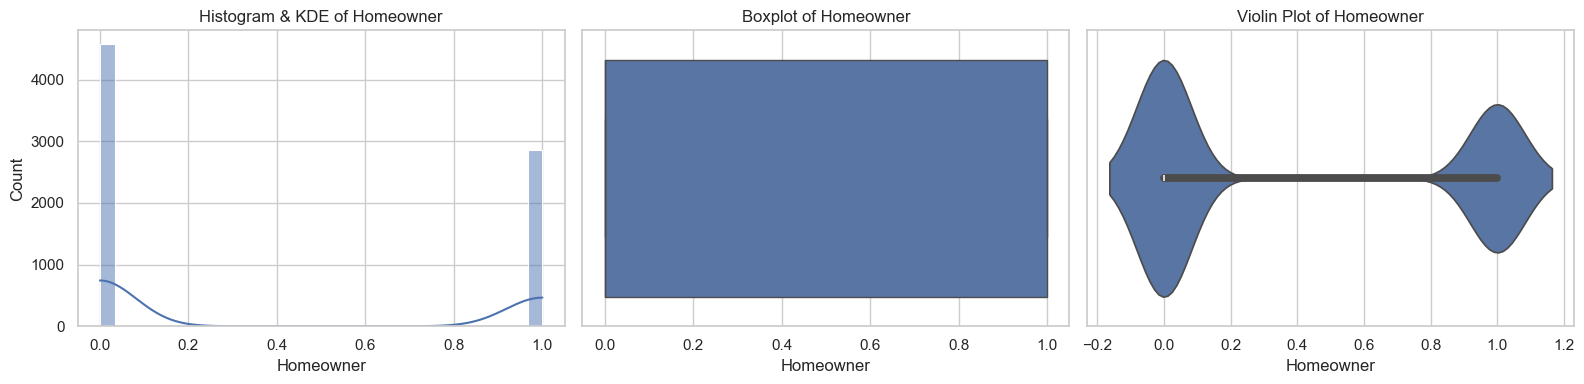

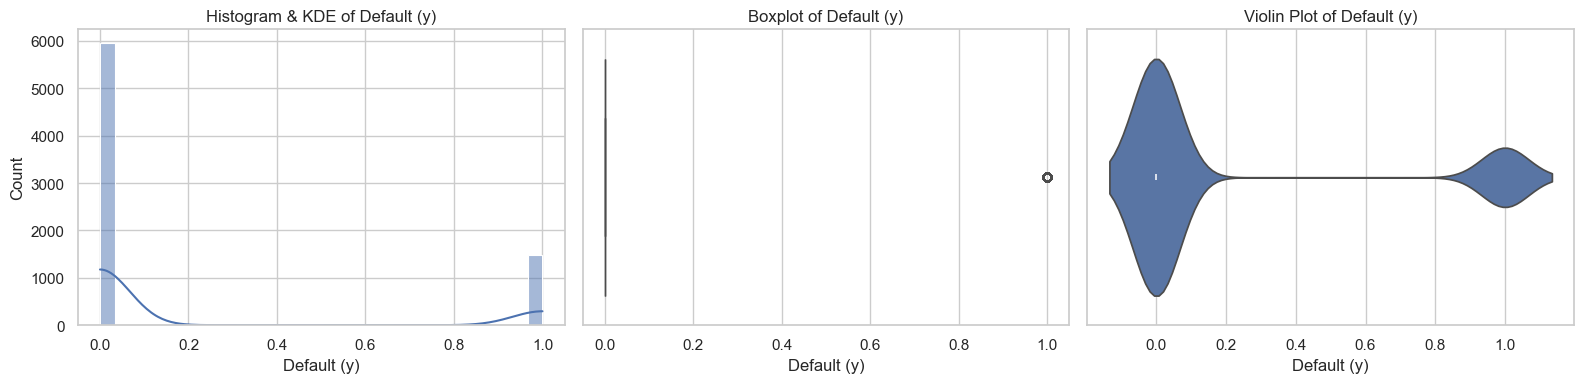

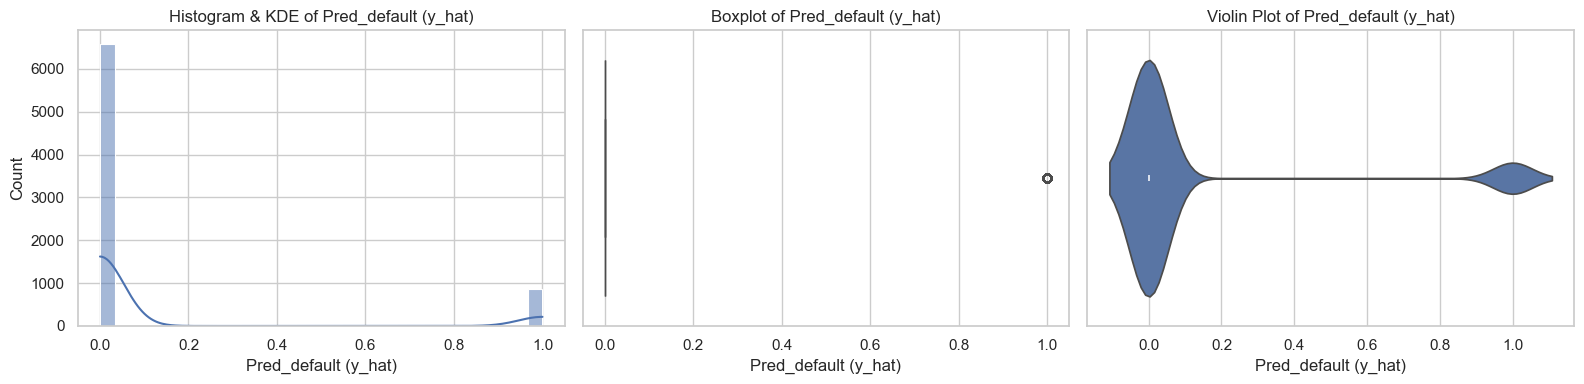

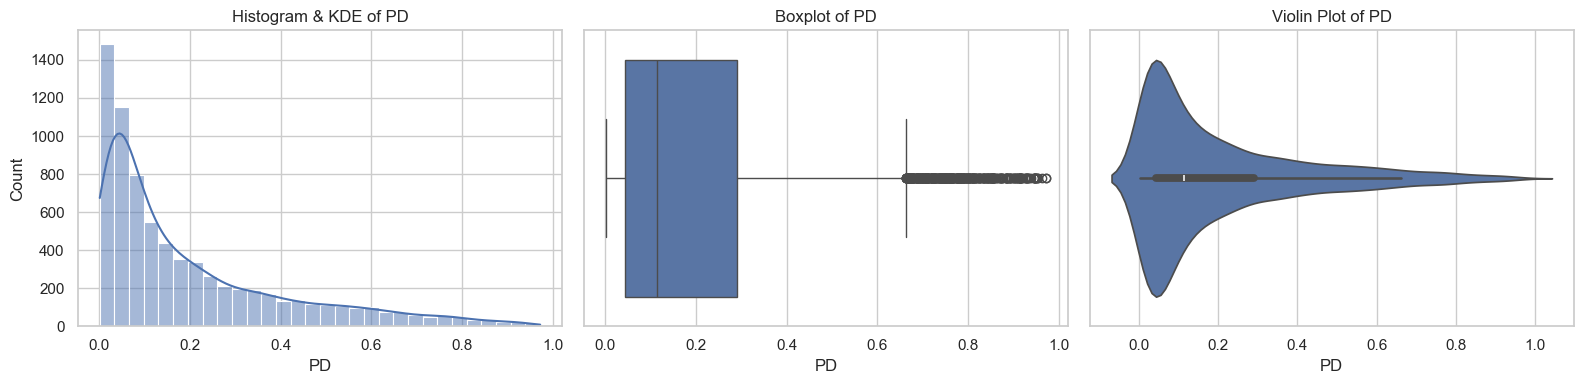

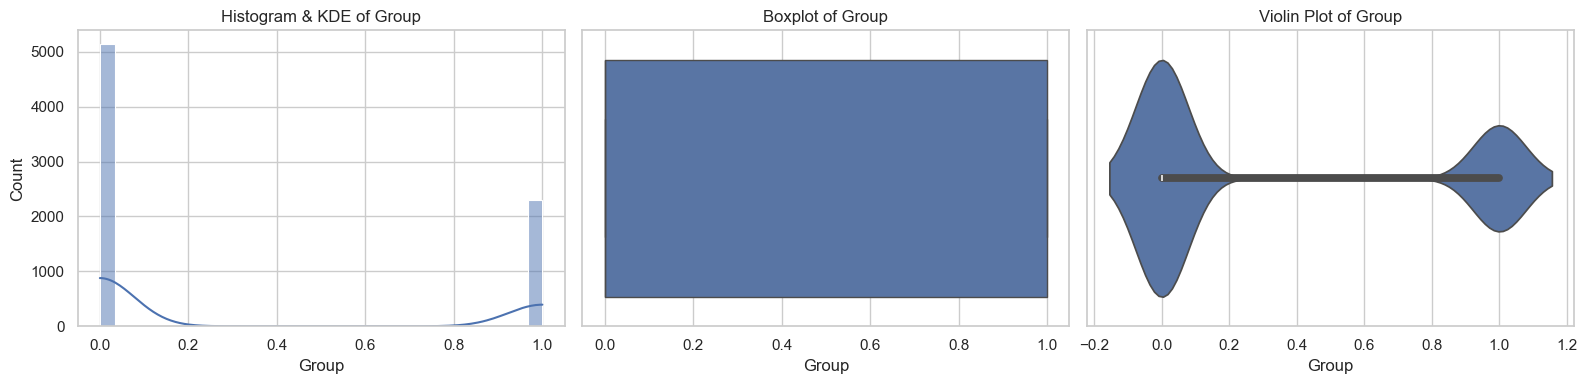

In [17]:
# ===== Distribution Analysis for Numeric Columns =====
print("\n==== Distribution Analysis for Numeric Columns ====")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns found:", numeric_cols)

for col in numeric_cols:
    # Remove missing values for plotting
    data = df[col].dropna()
    
    plt.figure(figsize=(16, 4))
    
    # Histogram with KDE
    plt.subplot(1, 3, 1)
    sns.histplot(data, kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data)
    plt.title(f'Boxplot of {col}')
    
    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=data)
    plt.title(f'Violin Plot of {col}')
    
    plt.tight_layout()
    plt.show()

In [18]:
# ===== Univariate Outlier Detection using IQR Method =====
print("\n==== Univariate Outlier Detection (IQR Method) ====")

def detect_outliers_IQR(series):
    """Detects outliers in a Pandas Series using the IQR method."""
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]

for col in numeric_cols:
    data = df[col].dropna()
    outliers = detect_outliers_IQR(data)
    print(f"\nOutliers in '{col}' (Total {len(outliers)}):")
    print(outliers)


==== Univariate Outlier Detection (IQR Method) ====

Outliers in 'ID' (Total 0):
Series([], Name: ID, dtype: int64)

Outliers in 'Job tenure' (Total 206):
19      44
26      44
38      40
88      39
135     38
        ..
7297    40
7298    38
7374    39
7392    39
7401    39
Name: Job tenure, Length: 206, dtype: int64

Outliers in 'Age' (Total 1):
3183    89
Name: Age, dtype: int64

Outliers in 'Car price' (Total 107):
52      35480
59      29139
178     35010
401     30968
416     31000
        ...  
7289    35200
7297    39136
7322    30500
7346    29980
7371    29500
Name: Car price, Length: 107, dtype: int64

Outliers in 'Funding amount' (Total 116):
43      27985
77      29248
82      29000
142     27364
155     29000
        ...  
6924    27800
7054    29500
7242    27490
7318    29023
7423    27815
Name: Funding amount, Length: 116, dtype: int64

Outliers in 'Down payment' (Total 664):
23      1
51      1
53      1
57      1
58      1
       ..
7389    1
7390    1
7394    1
741


==== Correlation Analysis ====


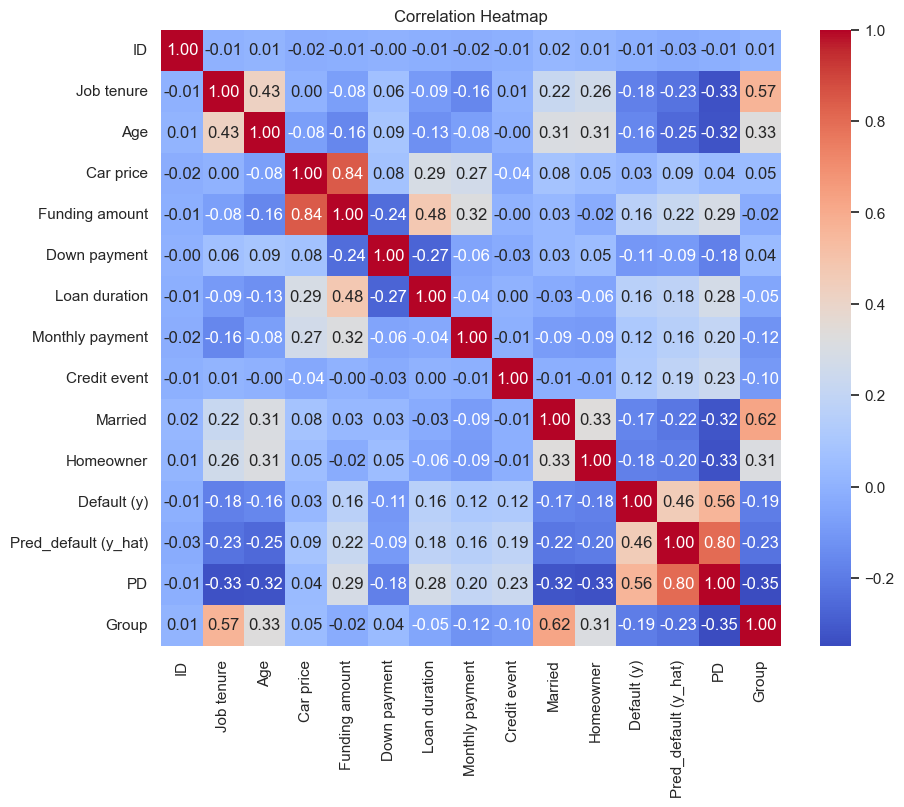

In [22]:

# ===== Correlation Analysis =====
print("\n==== Correlation Analysis ====")
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



==== Multivariate Analysis (Pairplot) ====


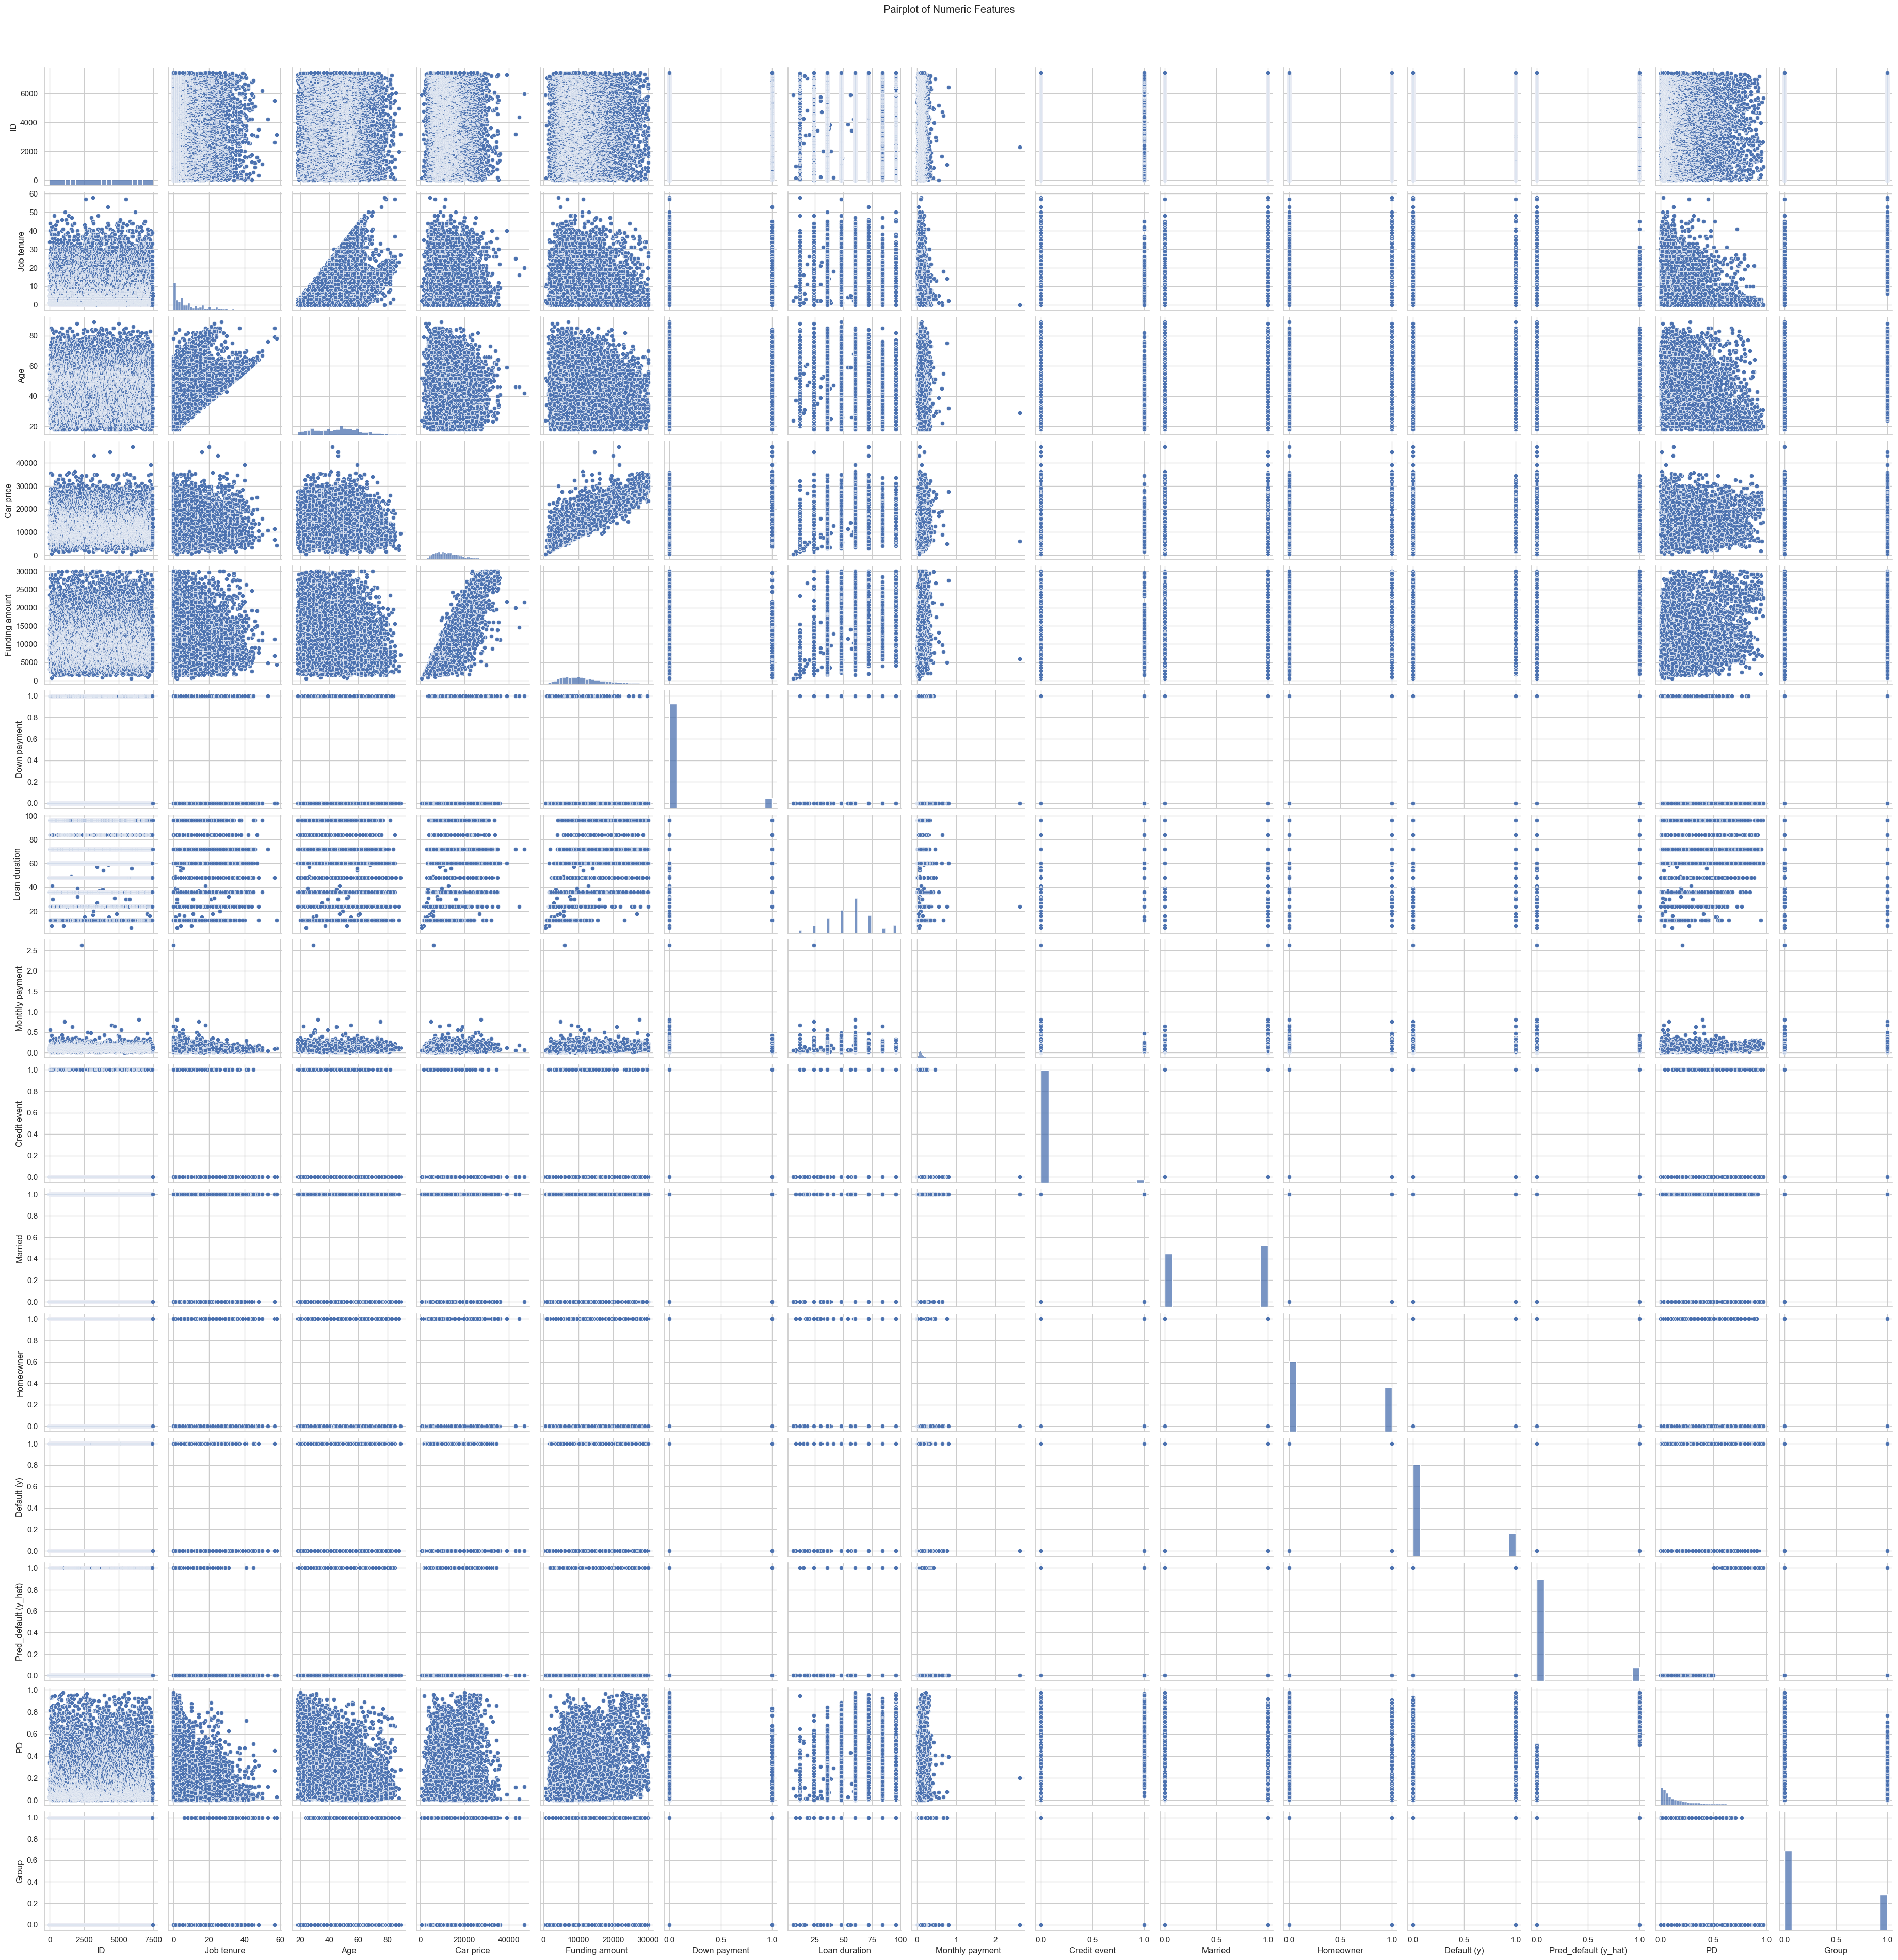

In [20]:

# ===== Multivariate Analysis =====
print("\n==== Multivariate Analysis (Pairplot) ====")
# Drop rows with missing numeric data for pairplot
df_numeric = df[numeric_cols].dropna()
sns.pairplot(df_numeric)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


In [26]:
import plotly.express as px

# Identify binary features (columns with exactly 2 unique non-missing values)
binary_cols = [col for col in df.columns if df[col].dropna().nunique() < 10]
print("Binary features found:", binary_cols)

# Generate a pie chart for each binary feature using Plotly
for col in binary_cols:
    counts = df[col].value_counts()
    fig = px.pie(
        names=counts.index.astype(str), 
        values=counts.values,
        title=f'Pie Chart for {col}',
        hole=0.3  # Optional: creates a donut-style chart
    )
    fig.show()


Binary features found: ['Down payment', 'Credit event', 'Married', 'Homeowner', 'Default (y)', 'Pred_default (y_hat)', 'Group']
